<a href="https://colab.research.google.com/github/Rebel095/data_analysis/blob/main/mental_heath_analysis_among_teenagers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental heath analysis among teenagers

## About Dataset
This dataset is designed to analyze mental health patterns in teenagers, focusing on stress levels using anonymized data from social media activity, surveys, and wearable devices. It consists of 5000 entries and 11 columns, each capturing different aspects of the user's daily behavior and well-being.

The goal is to detect correlations between factors like social media usage, physical activity, sleep patterns, and stress levels. This dataset can be useful for research on adolescent mental health, early stress detection, and preventive care.

**As part of the study, we will try to answer the following questions:**

1) Is there a relationship between self-reported stress and stress assessment measured by wearable devices?

2) Is there a relationship between self-reported stress levels and academic performance?

3) Is there a relationship between stress levels measured by wearable devices and academic performance?

4) What indicators correlate with subjective stress levels?

5) What indicators correlate with stress levels measured by devices?

## Data Description


* `User_ID` — Unique identifier for each participant
* `Age` — Age of the participant (13-19 years)
* `Gender` — Gender of the participant ("M" for Male, "F" for Female)
* `Social_Media_Hours` — Hours spent on social media per day
* `Exercise_Hours` — Hours spent exercising per day
* `Sleep_Hours` — Total hours of sleep per day
* `Screen_Time_Hours` — Total screen time per day (including social media, gaming, etc.)
* `Survey_Stress_Score` — Self-reported stress score (1 to 5 scale, where 1 is low stress and 5 is high stress)
* `Wearable_Stress_Score` — Stress score measured by wearable devices (range 0 to 1)
* `Support_System` — Column without descriptive part, requires explanation
* `Academic_Performance` —  Academic Performance (Excellent, Good, Poor, Average)


## 1. Opening data and exploring general information

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/kaggle/input/mental-heath-analysis-among-teenagers/mental_health_analysis.csv')
df

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,M,0.088148,1.003339,8.684888,5.922202,1,0.750205,Moderate,Average
4996,4997,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,Moderate,Excellent
4997,4998,14,M,3.444383,2.877972,9.227726,4.059322,4,0.002893,High,Good
4998,4999,18,F,7.866525,2.395839,4.317831,10.657076,2,0.612063,High,Average


In [ ]:
def EDA_table(df):

    EDA = pd.DataFrame({
        'Columns': pd.Series(dtype='object'),
        'Types': pd.Series(dtype='object'),
        'Values': pd.Series(dtype='object'),
        'Len': pd.Series(dtype='int64'),
        'Non-null': pd.Series(dtype='int64'),
        'Uniques': pd.Series(dtype='int64'),
        'Uniques(no nulls)': pd.Series(dtype='int64'),
        'Missing(n)': pd.Series(dtype='int64'),
        'Missing(%)': pd.Series(dtype='float64')
    })


    for c in df.columns:
        eda = {
            'Columns': c,
            'Types': df[c].dtypes,
            'Values': [df[c].unique()],
            'Len': len(df[c]),
            'Non-null': len(df[c]) - df[c].isnull().sum(),
            'Uniques': len(df[c].unique()),
            'Uniques(no nulls)': df[c].nunique(),
            'Missing(n)': df[c].isnull().sum(),
            'Missing(%)': (df[c].isnull().sum() / len(df)).round(3) * 100
        }


        EDA = pd.concat([EDA, pd.DataFrame([eda])], ignore_index=True)

    return EDA

EDA_table(df)

,Columns,Types,Values,Len,Non-null,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,User_ID,int64,"[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",5000,5000,5000,5000,0,0.0
1,Age,int64,"[[16, 17, 15, 14, 18, 13]]",5000,5000,6,6,0,0.0
2,Gender,object,"[[F, M]]",5000,5000,2,2,0,0.0
3,Social_Media_Hours,float64,"[[9.654486346, 9.158143482, 5.028755201, 7.951...",5000,5000,5000,5000,0,0.0
4,Exercise_Hours,float64,"[[2.458001257, 0.392094761, 0.52011947, 1.0226...",5000,5000,5000,5000,0,0.0
5,Sleep_Hours,float64,"[[5.198925522, 8.866096662, 4.94309483, 5.2627...",5000,5000,5000,5000,0,0.0
6,Screen_Time_Hours,float64,"[[8.158188998, 5.151993467, 9.209325483, 9.823...",5000,5000,5000,5000,0,0.0
7,Survey_Stress_Score,int64,"[[3, 5, 2, 4, 1]]",5000,5000,5,5,0,0.0
8,Wearable_Stress_Score,float64,"[[0.288962247, 0.409446165, 0.423837485, 0.666...",5000,5000,5000,5000,0,0.0
9,Support_System,object,"[[Moderate, High, Low]]",5000,5000,3,3,0,0.0


There are no case errors or other duplicate values in the categorical columns.

In the column `User_ID` unique values.

**Let's see how users are distributed by `Age`**

In [ ]:
df['Age'].value_counts()

Age
13    870
17    852
16    842
18    821
15    812
14    803
Name: count, dtype: int64

**Let's see how users are distributed by `Gender`**

In [ ]:
df['Gender'].value_counts()

Gender
F    2528
M    2472
Name: count, dtype: int64

**Conclusion:**

Data by age and gender are distributed evenly.

Even distribution of age and gender in a data set is not strictly necessary for calculating correlation, but it can affect the interpretation of the results. Let's look at why this is important and what nuances should be taken into account.

**1. What is correlation?**
Correlation measures the strength and direction of the linear relationship between two variables. It is independent of the distribution of the data, but can be sensitive to outliers and skewed distributions.

**2. The impact of uneven distribution**
If the data is unevenly distributed (e.g. most users are in one age group, while other groups are underrepresented), this can lead to the following consequences:

* **Result bias:** The correlation may be heavily influenced by the predominant age group. For example, if 90% of the data are 13-year-old users, the correlation will mostly reflect their behavior, rather than the general trend.

* **Underrepresentativeness:** If some age groups are underrepresented, the correlation for these groups may be unreliable or statistically insignificant.

* **Interpretation issues:** If the data is uneven, the correlation may not reflect the true relationship between variables for all age groups.

**3. When is a uniform distribution important?**

A uniform age distribution becomes important when:

* You want to study the correlation for each group separately. In this case, a skewed distribution may result in missing data for some groups.

* You want to draw conclusions that will generalize to the entire population. If the data is skewed, the conclusions may be biased toward the dominant group.

**4. How to deal with skewed distributions?**

If your data is skewed, you can take the following steps:

* **Stratify your data:** Divide your data into groups and analyze the correlation for each group separately.

* **Weight your data:** If some groups are underrepresented, you can apply weights to adjust for their impact on the overall result.

* **Collect additional data:** If possible, collect more data for underrepresented groups.

* **Check for statistical significance:** Make sure the correlation for each group is statistically significant, especially if your data is sparse.

## 2. Answers to questions

We will evaluate the relationship using the Pearson correlation criterion.

The Pearson correlation criterion is a method of parametric statistics that allows you to determine the presence or absence of a linear relationship between two quantitative indicators, as well as to evaluate its tightness and statistical significance. In other words, the Pearson correlation criterion allows you to determine whether one indicator changes (increases or decreases) in response to changes in the other?

The values of the Pearson correlation coefficient ($r$) are interpreted based on its absolute values. Possible values of the correlation coefficient vary from $0$ to $\pm \, 1$. The higher the absolute value of rxy, the higher the tightness of the relationship between the two values.

$r_{xy} = 0$ indicates a complete absence of connection.

$r_{xy} = 1$ indicates the presence of an absolute (functional) connection. If the value of the Pearson correlation criterion is greater than 1 or less than -1, there is an error in the calculations.

To assess the tightness, or strength, of a correlation, generally accepted criteria are usually used, according to which absolute values of $r_{xy} < 0.3$ indicate a weak relationship, values of $r_{xy}$ from $0.3$ to $0.7$ indicate a relationship of medium tightness, and values of $r_{xy} > 0.7$ indicate a strong relationship.

A more accurate assessment of the strength of the correlation can be obtained by using the Chaddock table:

Absolute value $r_{xy}$|Strength of relationship
---|---|
less than 0.3|low
from 0.3 to 0.5|medium
from 0.5 to 0.7|visible
0.7 to 0.9|high
over 0.9|very high

### 2.1 Is there a relationship between self-reported stress and stress assessment measured by wearable devices?

#### 2.1.1 All data

In [ ]:
df['Survey_Stress_Score'].corr(df['Wearable_Stress_Score'])

0.003993771341133139

There is no relationship between self-reported stress levels and stress scores measured by wearable devices when analyzing the entire data set.

You can try looking at the details by gender and age groups.

The lack of correlation between self-reported stress and objective measurements via wearables may point to several possible interpretations:

1. **Inaccuracy of self-reporting:** People may underestimate their stress levels due to subjectivity, lack of awareness, or a tendency to overestimate or underestimate their experiences.

2. **Limitations of wearables:** Devices can only measure certain physiological parameters (e.g., heart rate, heart rate variability, sweating), which may not fully reflect the subjective experience of stress.

3. **Different aspects of stress:** Subjective assessment of stress may include emotional, cognitive, and social aspects, which may not always correlate with physiological indicators measured by devices.

4. **Time lag:** Physiological responses to stress may be delayed or may occur before a person is aware of the stressful state.

5. **Individual differences:** People react differently to stress, and what is highly stressful for one person may be minor for another. This may lead to discrepancies between subjective and objective data.

6. **Methodological issues:** The measurement methods used (self-assessment questionnaires and device parameters) may not be well-matched or may not capture all aspects of stress.


We will consider separately the impact of indicators on subjective perception of stress and stress level measured using wearable devices.

#### 2.1.2 Grouping by Age

In [ ]:
# function to calculate the correlation in each group
def calculate_correlation(group):
    return group['Survey_Stress_Score'].corr(group['Wearable_Stress_Score'])

In [ ]:
correlation_by_group = df.groupby('Age').apply(calculate_correlation, include_groups=False)

correlation_by_group

Age
13   -0.017298
14    0.015012
15    0.031968
16   -0.006836
17   -0.004816
18    0.007162
dtype: float64

A weak correlation is observed only in the group of 15-year-old adolescents. In general, the analysis by age groups did not reveal a clear correlation in any of the groups. This suggests that the subjective assessment of the level of stress does not correlate with the assessment obtained using measuring devices in all adolescents of different age groups.

#### 2.1.3 Grouping by Gender

In [ ]:
correlation_by_group = df.groupby('Gender').apply(calculate_correlation, include_groups=False)

correlation_by_group

Gender
F    0.006284
M    0.001702
dtype: float64

Gender grouping also showed no correlation between subjective perceptions of stress and stress levels measured by devices.

#### 2.1.4 Gender grouping of 15 year olds only

Since there is some weak correlation in the 15-year-old group, let's take a closer look at this group by gender.

In [ ]:
df_filtered = df.query("Age == 15")

correlation_by_group = df_filtered.groupby('Gender').apply(calculate_correlation, include_groups=False)

correlation_by_group

Gender
F    0.046266
M    0.015931
dtype: float64

Only among 15-year-old girls was there a weak correlation between subjective stress levels and stress levels measured by measuring devices.

### 2.2 Is there a relationship between self-reported stress levels and academic performance?

To identify the correlation, we need to digitize the values: `Excellent`, `Good`, `Poor`, `Average` in the columm `Academic_Performance`.

In [ ]:
performance_mapping = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}
df['Performance_numeric'] = df['Academic_Performance'].map(performance_mapping)

#### 2.2.1 All data

In [ ]:
df['Survey_Stress_Score'].corr(df['Performance_numeric'])

-0.010586952138695023

A negative value indicates an inverse relationship (as it should be in our hypothesis). But in our case, there is no significant correlation.

#### 2.2.2 Grouping by Age

In [ ]:
def calculate_correlation(group):
    return group['Survey_Stress_Score'].corr(group['Performance_numeric'])

correlation_by_group = df.groupby('Age').apply(calculate_correlation, include_groups=False)

correlation_by_group

Age
13   -0.051574
14    0.030445
15   -0.008799
16    0.009682
17   -0.067101
18    0.026710
dtype: float64

In general, the analysis by age groups did not reveal a clear correlation in any of the groups.

#### 2.2.3 Grouping by Gender

In [ ]:
correlation_by_group = df.groupby('Gender').apply(calculate_correlation, include_groups=False)

correlation_by_group

Gender
F   -0.015946
M   -0.005294
dtype: float64

The same is true for grouping by gender.

### 2.3 Is there a relationship between stress levels measured by wearable devices and academic performance?

#### 2.3.1 All data

In [ ]:
df['Wearable_Stress_Score'].corr(df['Performance_numeric'])

-0.01302657647678842

A negative value indicates an inverse relationship (as it should be in our hypothesis). But in our case, there is no significant correlation.

#### 2.3.2 Grouping by Age

In [ ]:
def calculate_correlation(group):
    return group['Wearable_Stress_Score'].corr(group['Performance_numeric'])

correlation_by_group = df.groupby('Age').apply(calculate_correlation, include_groups=False)

correlation_by_group

Age
13   -0.054853
14   -0.019792
15   -0.020919
16   -0.009384
17    0.025700
18    0.004763
dtype: float64

In general, the analysis by age groups did not reveal a clear correlation in any of the groups.

#### 2.3.3 Grouping by Gender

In [ ]:
correlation_by_group = df.groupby('Gender').apply(calculate_correlation, include_groups=False)

correlation_by_group

Gender
F    0.015186
M   -0.041132
dtype: float64

The same is true for grouping by gender.

### 2.4 What indicators correlate with subjective stress levels?

#### 2.4.1 All data

In [ ]:
# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
print('Numeric columns used for correlation:', list(numeric_df.columns))

Numeric columns used for correlation: ['User_ID', 'Age', 'Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours', 'Survey_Stress_Score', 'Wearable_Stress_Score', 'Performance_numeric']


In [ ]:
del numeric_df['User_ID']

In [ ]:
numeric_df.corr()[['Survey_Stress_Score']].sort_values(by='Survey_Stress_Score', ascending=False)

,Survey_Stress_Score
Survey_Stress_Score,1.000000
Sleep_Hours,0.024097
Age,0.013441
Wearable_Stress_Score,0.003994
Exercise_Hours,0.002489
Social_Media_Hours,-0.003035
Screen_Time_Hours,-0.003991
Performance_numeric,-0.010587


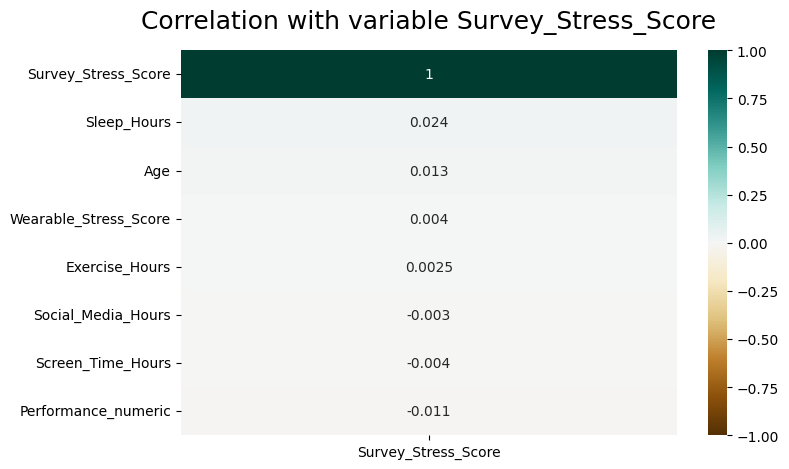

In [ ]:
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(numeric_df.corr()[['Survey_Stress_Score']].sort_values(by='Survey_Stress_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation with variable Survey_Stress_Score', fontdict={'fontsize':18}, pad=16);

I use a divergent color palette, which has noticeably different colors at the two ends of the value range with a pale, almost colorless midpoint, and it works much better with correlation heatmaps than the default colormap.

In our case, there are no features that correlate with subjective perception of stress.

#### 2.4.2 Grouping by Age

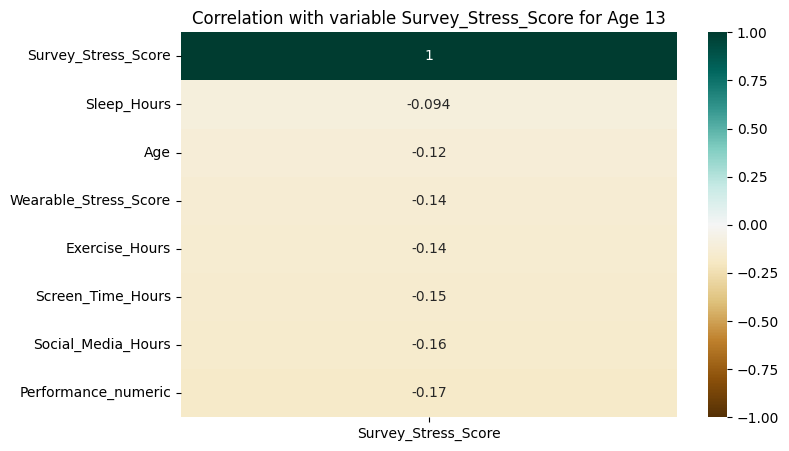

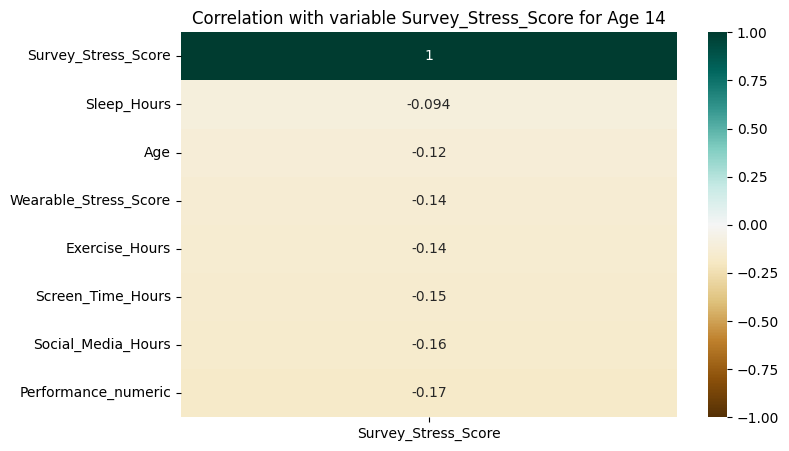

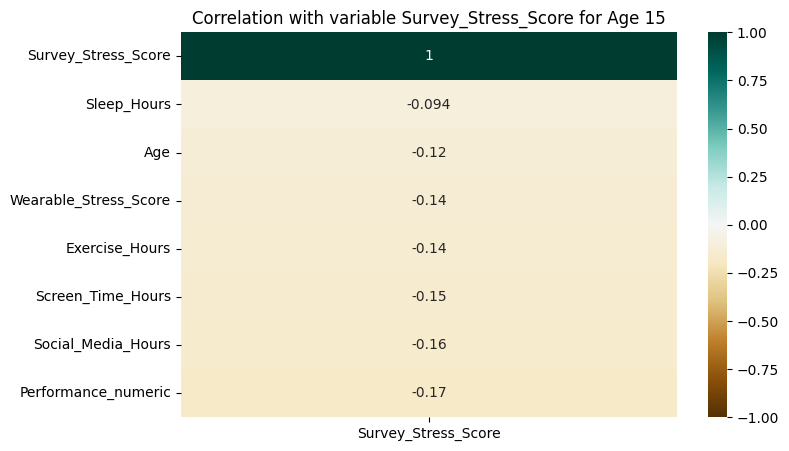

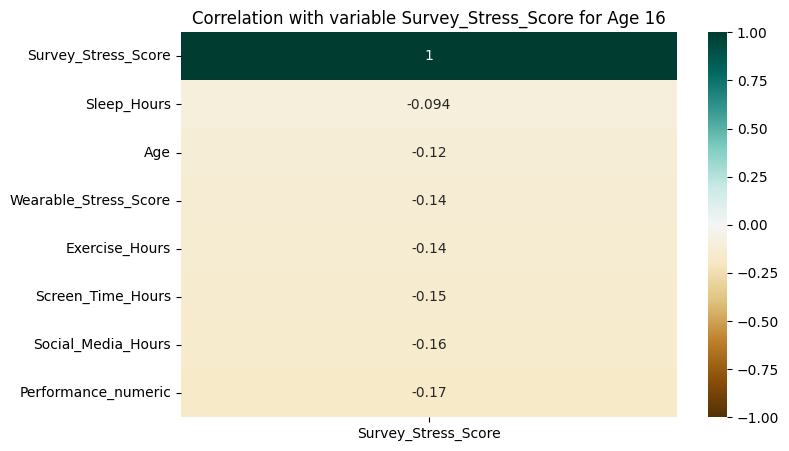

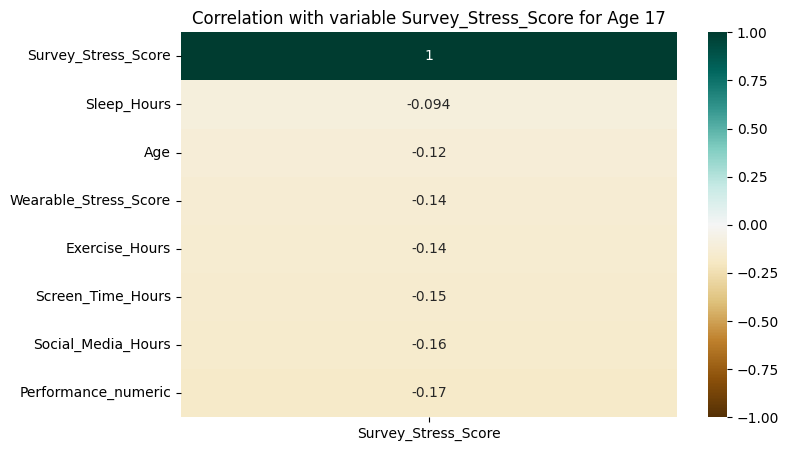

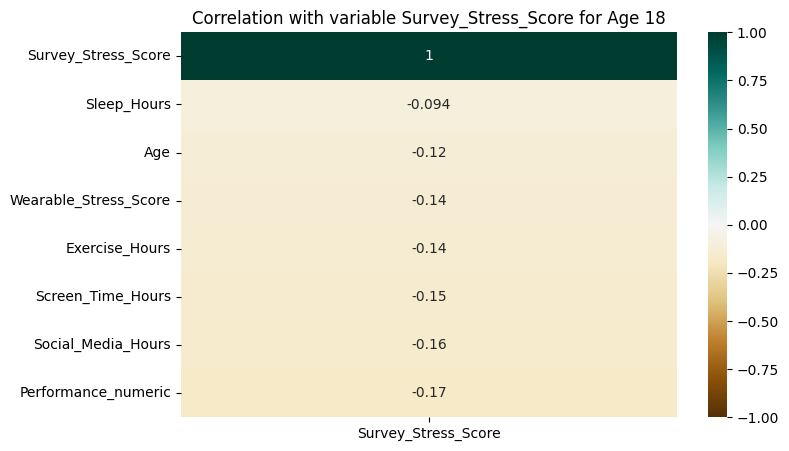

In [ ]:
for age, group in df.groupby('Age'):
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr_matrix.corr()[['Survey_Stress_Score']].sort_values(by='Survey_Stress_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    plt.title(f'Correlation with variable Survey_Stress_Score for Age {age}')
    plt.show()

There is almost no correlation across all age groups.

#### 2.4.3 Grouping by Gender

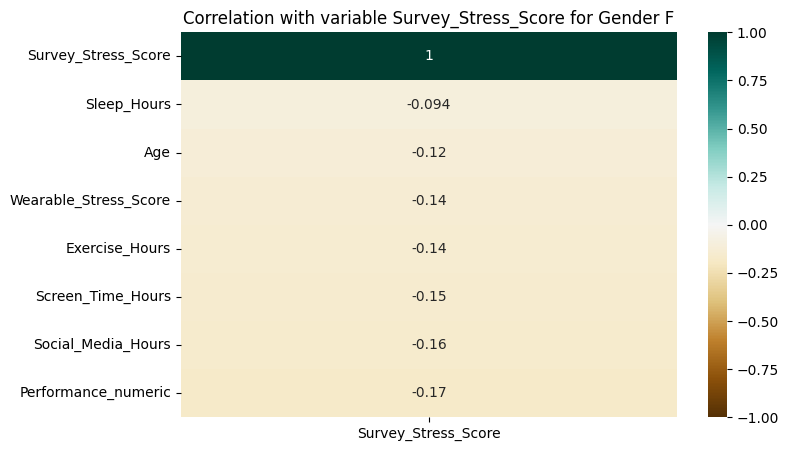

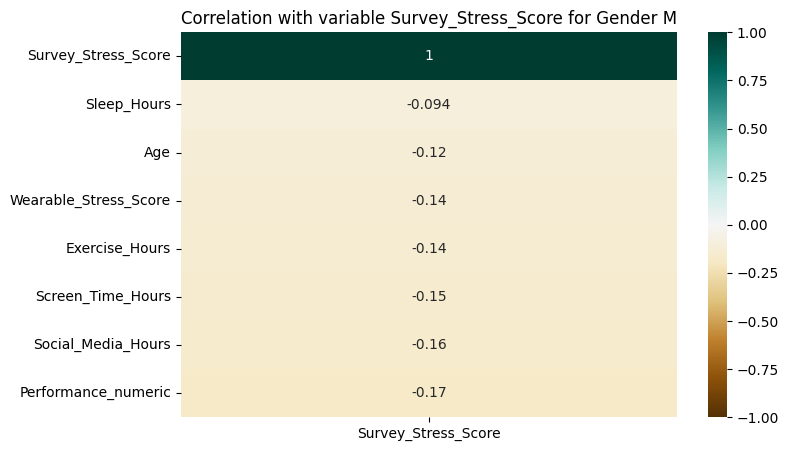

In [ ]:
for gender, group in df.groupby('Gender'):
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr_matrix.corr()[['Survey_Stress_Score']].sort_values(by='Survey_Stress_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    plt.title(f'Correlation with variable Survey_Stress_Score for Gender {gender}')
    plt.show()

There is almost no correlation across all gender groups.

### 2.5 What indicators correlate with stress levels measured by devices?

#### 2.5.1 All data

In [ ]:
numeric_df.corr()[['Wearable_Stress_Score']].sort_values(by='Wearable_Stress_Score', ascending=False)

,Wearable_Stress_Score
Wearable_Stress_Score,1.000000
Social_Media_Hours,0.019506
Age,0.015578
Survey_Stress_Score,0.003994
Exercise_Hours,-0.009297
Screen_Time_Hours,-0.010748
Sleep_Hours,-0.011803
Performance_numeric,-0.013027


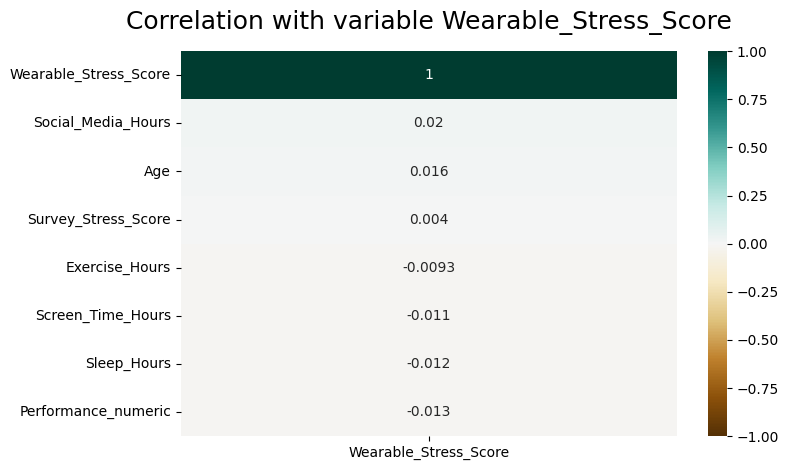

In [ ]:
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(numeric_df.corr()[['Wearable_Stress_Score']].sort_values(by='Wearable_Stress_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation with variable Wearable_Stress_Score', fontdict={'fontsize':18}, pad=16);

In our case, there are no features that correlate with Wearable Stress Score.

#### 2.5.2 Grouping by Age

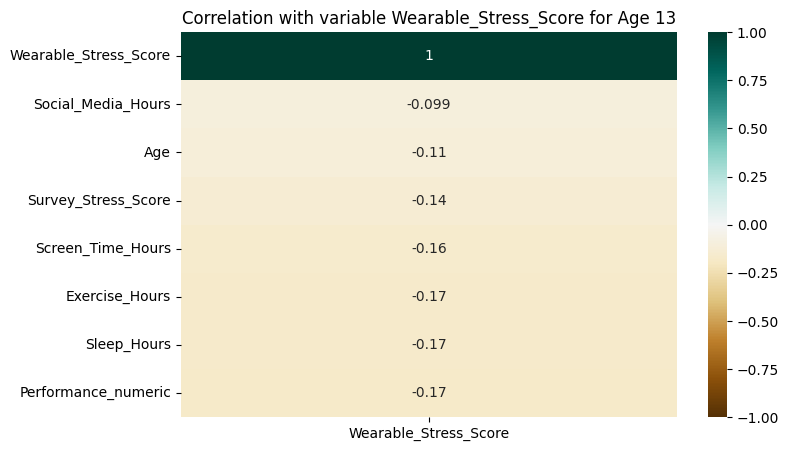

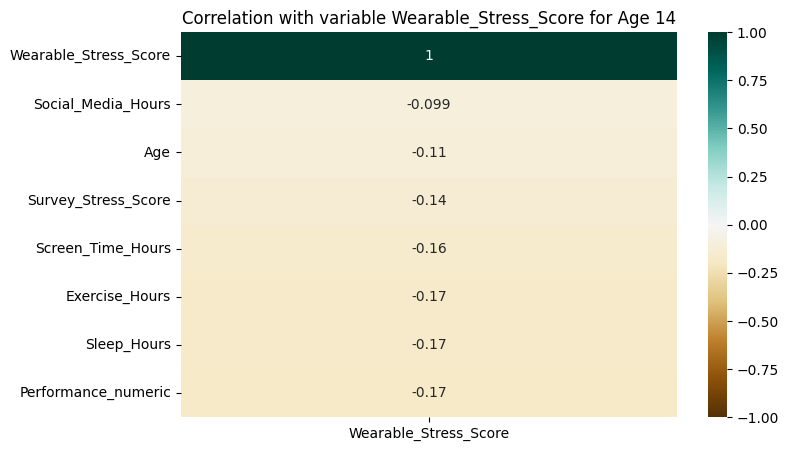

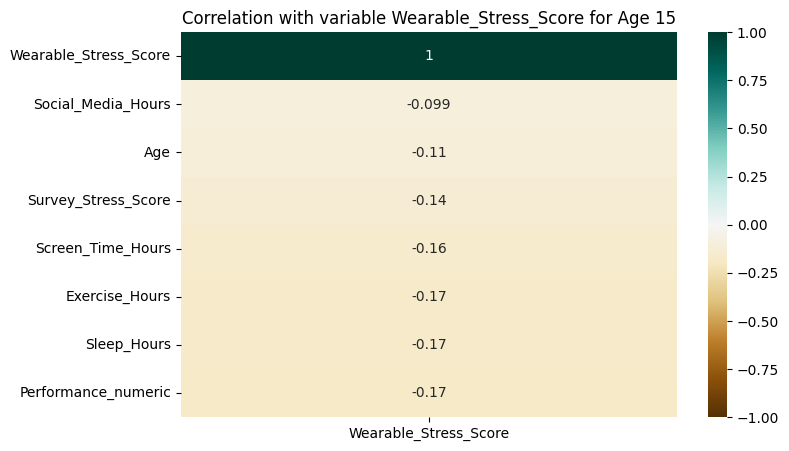

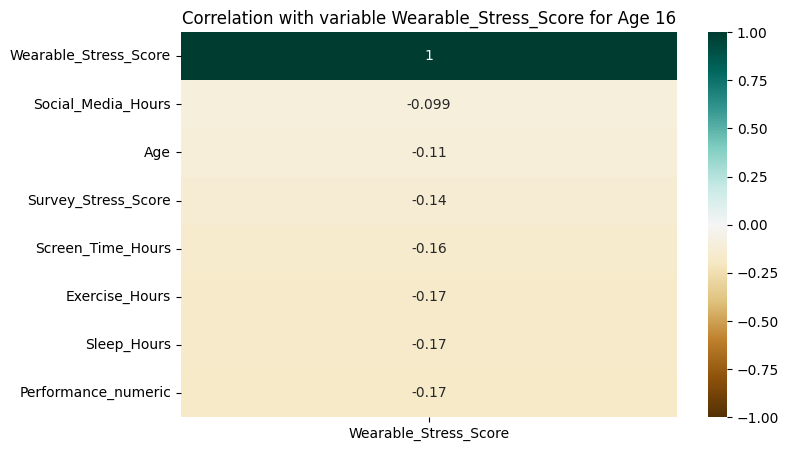

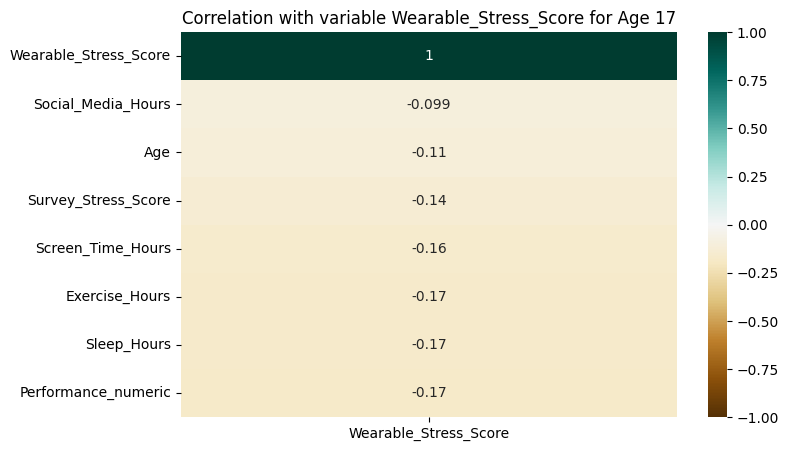

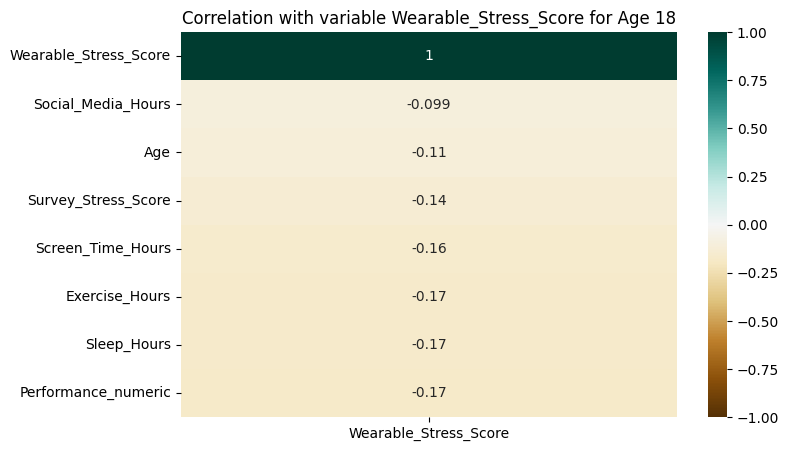

In [ ]:
for age, group in df.groupby('Age'):
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr_matrix.corr()[['Wearable_Stress_Score']].sort_values(by='Wearable_Stress_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    plt.title(f'Correlation with variable Wearable_Stress_Score for Age {age}')
    plt.show()

There is almost no correlation across all age groups.

#### 2.5.3 Grouping by Gender

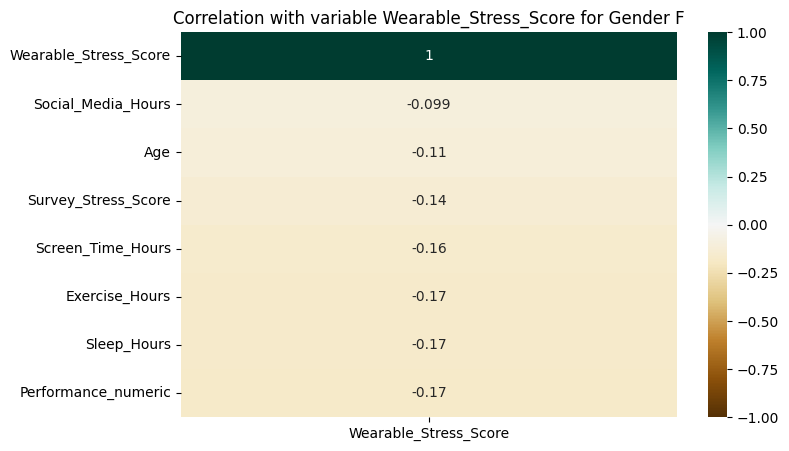

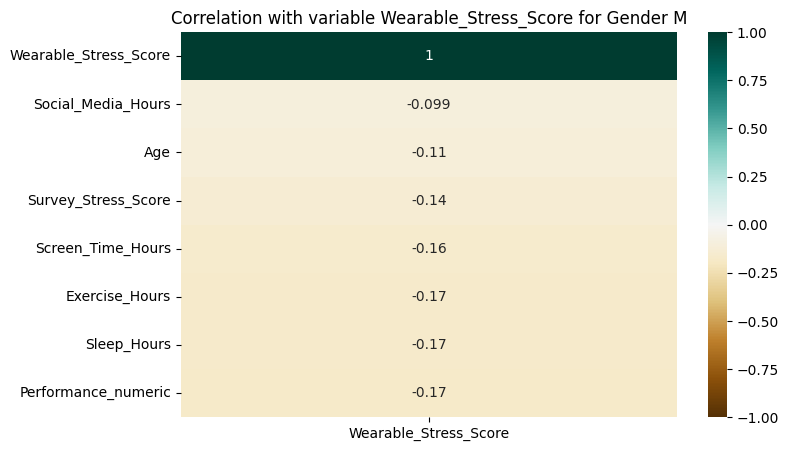

In [ ]:
for gender, group in df.groupby('Gender'):
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr_matrix.corr()[['Wearable_Stress_Score']].sort_values(by='Wearable_Stress_Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    plt.title(f'Correlation with variable Wearable_Stress_Score for Gender {gender}')
    plt.show()

There is almost no correlation across all gender groups.

## 3. Conclusion

Our analysis did not reveal any correlation. We are probably dealing with synthetic data.

